# Linear Regression

Linear regression is one of the supervised Machine learning algorithms in Python that observes continuous features and predicts an outcome. Depending on whether it runs on a single variable or on many features, we can call it simple linear regression or multiple linear regression.

Y=a*X+b

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
diabetes=datasets.load_diabetes()
diabetes_X=diabetes.data[:,np.newaxis,2]
diabetes_X_train=diabetes_X[:-30] #splitting data into training and test sets
diabetes_X_test=diabetes_X[-30:]
diabetes_y_train=diabetes.target[:-30] #splitting targets into training and test sets
diabetes_y_test=diabetes.target[-30:]
diabetes_y_test=diabetes.target[-30:]
regr=linear_model.LinearRegression() #Linear regression object
regr.fit(diabetes_X_train,diabetes_y_train) #Use training sets to train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2]:
diabetes_y_pred=regr.predict(diabetes_X_test) #Make predictions
regr.coef_

array([941.43097333])

In [3]:
mean_squared_error(diabetes_y_test,diabetes_y_pred)

3035.0601152912695

In [4]:
r2_score(diabetes_y_test,diabetes_y_pred) #Variance score

0.410920728135835

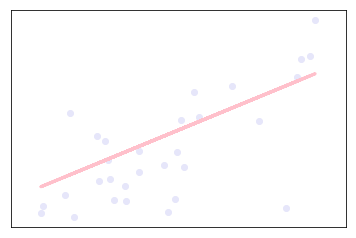

In [5]:
plt.scatter(diabetes_X_test,diabetes_y_test,color ='lavender')
plt.plot(diabetes_X_test,diabetes_y_pred,color='pink',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
# https://colab.research.google.com/drive/1jK2GYCKiJwhHwKnfNoxOAaRQWY9a4280#scrollTo=BDalWkpdFB1-
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(225)
data_x = np.linspace(-10.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
#data_y = 29*data_x  + 20* np.random.randn(100, 1)
data_x /= np.max(data_x)
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [8]:
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [9]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print (test_x.size, train_x.size, test_y.size, train_y.size)
print (test_x)

40 160 20 80
[[ 1.          0.37373737]
 [ 1.         -0.19191919]
 [ 1.          0.45454545]
 [ 1.         -0.81818182]
 [ 1.          0.57575758]
 [ 1.          0.91919192]
 [ 1.          0.33333333]
 [ 1.         -0.45454545]
 [ 1.         -0.57575758]
 [ 1.         -1.        ]
 [ 1.         -0.25252525]
 [ 1.         -0.65656566]
 [ 1.         -0.5959596 ]
 [ 1.         -0.07070707]
 [ 1.          0.47474747]
 [ 1.          0.93939394]
 [ 1.          0.49494949]
 [ 1.          0.6969697 ]
 [ 1.          0.85858586]
 [ 1.          0.51515152]]


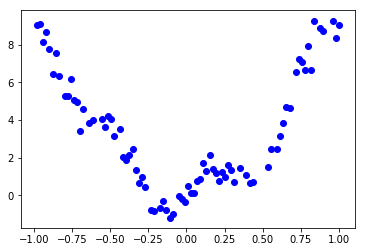

In [10]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [11]:
def get_gradient(w, x, y):
    y_estimate = (x**2).dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x**2)
    return gradient, mse

In [12]:
w = np.random.randn(2)
alpha = 0.25
tolerance = 1e-3
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
0.9908275646320475 0.27355061888057075
Iteration: 10 - Error: 4.7157
Updated Weights : 3.267464 , 2.370054
Iteration: 20 - Error: 3.3489
Updated Weights : 4.538952 , 2.065851
Iteration: 30 - Error: 2.4717
Updated Weights : 5.529184 , 1.714454
Iteration: 40 - Error: 1.8981
Updated Weights : 6.328553 , 1.426324
Iteration: 50 - Error: 1.5229
Updated Weights : 6.974947 , 1.193166
Iteration: 60 - Error: 1.2775
Updated Weights : 7.497680 , 1.004606
Iteration: 70 - Error: 1.1171
Updated Weights : 7.920413 , 0.852119
Iteration: 80 - Error: 1.0121
Updated Weights : 8.262276 , 0.728802
Iteration: 90 - Error: 0.9435
Updated Weights : 8.538738 , 0.629077
Iteration: 100 - Error: 0.8986
Updated Weights : 8.762313 , 0.548430
Iteration: 110 - Error: 0.8693
Updated Weights : 8.943117 , 0.483210
Iteration: 120 - Error: 0.8501
Updated Weights : 9.089332 , 0.430468
Iteration: 130 - Error: 0.8375
Updated Weights : 9.207576 , 0.387815
Iteration: 140 - Error: 0.8293
Updated Weights 

In [13]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x^2 + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 9.672996.x^2 + 0.219929


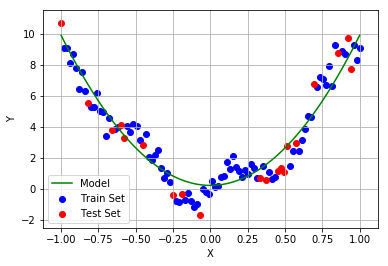

In [14]:
plt.plot(data_x[:,1], (data_x**2).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Linear regression with various methods

This is a very simple example of using two scipy tools for linear regression

Scipy.Polyfit

Stats.linregress

Optimize.curve_fit

numpy.linalg.lstsq

statsmodels.OLS

Analytic solution using Moore-Penrose generalized inverse or simple multiplicative matrix inverse

sklearn.linear_model.LinearRegression

In [15]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

# Generate random data of a sufficiently large size

In [16]:
#Sample data creation
#number of points 
n=int(5e6)
t=np.linspace(-10,10,n)
#parameters
a=3.25; b=-6.5
x=polyval([a,b],t)
#add some noise
xn=x+3*randn(n)

# Draw few random sample points and plot

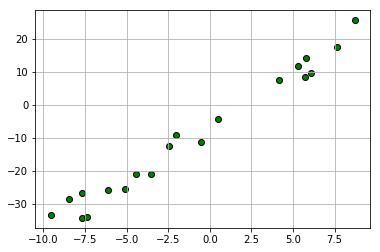

In [17]:
xvar=np.random.choice(t,size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='green',edgecolors='k')
plt.grid(True)
plt.show()

# Method: Scipy.Polyfit

In [18]:
#Linear regressison -polyfit - polyfit can be used other orders polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: a=3.25 b=-6.50, ms error= 3.000
Time taken: 2.2867023944854736 seconds


# Method: Stats.linregress

In [19]:
#Linear regression using stats.linregress
t1=time.time()
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.linregress')
print('a=%.2f b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
a=3.25 b=-6.50, std error= 0.000, r^2 coefficient= 0.987
Time taken: 0.15340065956115723 seconds


# Method: Optimize.curve_fit

In [20]:
def flin(t,a,b):
    result = a*t+b
    return(result)

In [21]:
t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=3.25 b=-6.50
Time taken: 1.1999096870422363 seconds


# Method: numpy.linalg.lstsq

In [22]:

t1=time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn)
ar,br = result[0]
err = np.sqrt(result[1]/len(xn))
t2=time.time()
t_linalg_lstsq = float(t2-t1)

print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_linalg_lstsq))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


Linear regression using numpy.linalg.lstsq
parameters: a=3.25 b=-6.50, ms error= 3.000
Time taken: 0.34130382537841797 seconds


# Method: Statsmodels.OLS

In [23]:
t1=time.time()
t=sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar=results.params[1]
br=results.params[0]
t2=time.time()
t_OLS = float(t2-t1)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))

Linear regression using statsmodels.OLS
parameters: a=3.25 b=-6.50
Time taken: 1.3467481136322021 seconds


In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.451e+35
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:51:31   Log-Likelihood:             1.4618e+08
No. Observations:             5000000   AIC:                        -2.924e+08
Df Residuals:                 4999998   BIC:                        -2.924e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5000   2.17e-17  -2.99e+17      0.0

# Analytic solution using Moore-Penrose pseudoinverse

In [25]:

t1=time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
t2=time.time()
t_inv_matrix = float(t2-t1)

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix))

Linear regression using Moore-Penrose inverse
parameters: a=3.25 b=-6.50
Time taken: 0.4478321075439453 seconds


# Analytic solution using simple multiplicative matrix inverse

In [26]:
t1=time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
t2=time.time()
t_simple_inv = float(t2-t1)

print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv))

Linear regression using simple inverse
parameters: a=3.25 b=-6.50
Time taken: 0.21773076057434082 seconds


# Method: sklearn.linear_model.LinearRegression

In [27]:
t1=time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear))

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.25 b=-6.50
Time taken: 0.6521878242492676 seconds


# Bucket all the execution times in a list and plot

In [28]:
times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,t_inv_matrix,t_simple_inv,t_sklearn_linear]

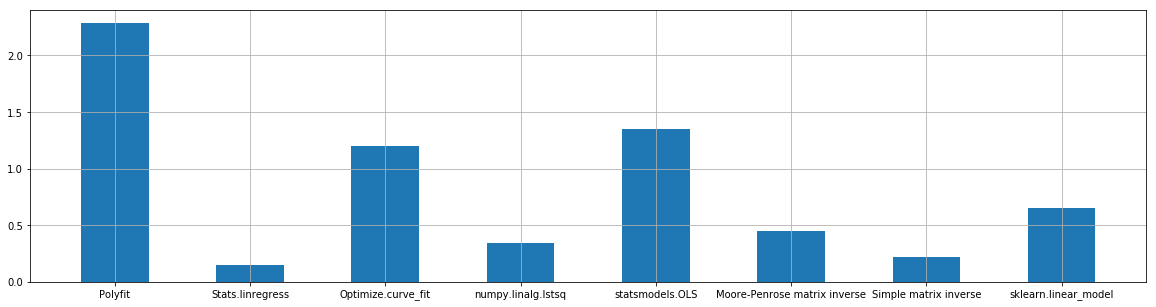

In [44]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(x=[l*0.8 for l in range(8)],height=times, width=0.4,
        tick_label=['Polyfit','Stats.linregress','Optimize.curve_fit',
                    'numpy.linalg.lstsq','statsmodels.OLS','Moore-Penrose matrix inverse',
                    'Simple matrix inverse','sklearn.linear_model'])
plt.show()

In [33]:
n_min = 50000
n_max = int(1e7)
n_levels = 25
r = np.log10(n_max/n_min)
l = np.linspace(0,r,n_levels)
n_data = list((n_min*np.power(10,l)))
n_data = [int(n) for n in n_data]

In [34]:
#time_dict={'Polyfit':[],'Stats.lingress':[],'Optimize.curve_fit':[],'linalg.lstsq':[],'statsmodels.OLS':[],
          #'Moore-Penrose matrix inverse':[],'Simple matrix inverse':[], 'sklearn.linear_model':[]}

l1=['Polyfit', 'Stats.lingress','Optimize.curve_fit', 'linalg.lstsq', 
 'statsmodels.OLS', 'Moore-Penrose matrix inverse', 'Simple matrix inverse', 'sklearn.linear_model']
time_dict = {key:[] for key in l1}

from tqdm import tqdm

for i in tqdm(range(len(n_data))):
    t=np.linspace(-10,10,n_data[i])
    #parameters
    a=3.25; b=-6.5
    x=polyval([a,b],t)
    #add some noise
    xn=x+3*randn(n_data[i])
    
    #Linear regressison -polyfit - polyfit can be used other orders polynomials
    t1=time.time()
    (ar,br)=polyfit(t,xn,1)
    t2=time.time()
    t_polyfit = 1e3*float(t2-t1)
    time_dict['Polyfit'].append(t_polyfit)
    
    #Linear regression using stats.linregress
    t1=time.time()
    (a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
    t2=time.time()
    t_linregress = 1e3*float(t2-t1)
    time_dict['Stats.lingress'].append(t_linregress)
    
    #Linear regression using optimize.curve_fit
    t1=time.time()
    p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
    t2=time.time()
    t_optimize_curve_fit = 1e3*float(t2-t1)
    time_dict['Optimize.curve_fit'].append(t_optimize_curve_fit)
    
    # Linear regression using np.linalg.lstsq (solving Ax=B equation system)
    t1=time.time()
    A = np.vstack([t, np.ones(len(t))]).T
    result = np.linalg.lstsq(A, xn)
    ar,br = result[0]
    t2=time.time()
    t_linalg_lstsq = 1e3*float(t2-t1)
    time_dict['linalg.lstsq'].append(t_linalg_lstsq)
    
    # Linear regression using statsmodels.OLS
    t1=time.time()
    t=sm.add_constant(t)
    model = sm.OLS(x, t)
    results = model.fit()
    ar=results.params[1]
    br=results.params[0]
    t2=time.time()
    t_OLS = 1e3*float(t2-t1)
    time_dict['statsmodels.OLS'].append(t_OLS)
    
    # Linear regression using Moore-Penrose pseudoinverse matrix
    t1=time.time()
    mpinv = np.linalg.pinv(t)
    result = mpinv.dot(x)
    ar = result[1]
    br = result[0]
    t2=time.time()
    t_mpinverse = 1e3*float(t2-t1)
    time_dict['Moore-Penrose matrix inverse'].append(t_mpinverse)
    
    # Linear regression using simple multiplicative inverse matrix
    t1=time.time()
    m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
    ar = m[1]
    br = m[0]
    t2=time.time()
    t_simple_inv = 1e3*float(t2-t1)
    time_dict['Simple matrix inverse'].append(t_simple_inv)
    
    # Linear regression using scikit-learn's linear_model
    t1=time.time()
    lm = LinearRegression()
    lm.fit(t,x)
    ar=lm.coef_[1]
    br=lm.intercept_
    t2=time.time()
    t_sklearn_linear = 1e3*float(t2-t1)
    time_dict['sklearn.linear_model'].append(t_sklearn_linear)


  0%|                                                                                           | 0/25 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  4%|███▎                                                                               | 1/25 [00:00<00:02,  9.41it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launche

 72%|███████████████████████████████████████████████████████████                       | 18/25 [00:11<00:11,  1.61s/it]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [00:14<00:11,  1.92s/it]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
 80%|███████████████████████████████████████████████████████

In [35]:
df = pd.DataFrame(data=time_dict)
df

,Polyfit,Stats.lingress,Optimize.curve_fit,linalg.lstsq,statsmodels.OLS,Moore-Penrose matrix inverse,Simple matrix inverse,sklearn.linear_model
0,4.009008,2.006531,8.020639,17.554998,50.654888,12.079239,0.940323,3.031492
1,6.040096,2.064705,8.976221,4.044294,37.043810,4.044294,0.962734,7.036686
2,8.019686,2.024889,14.649868,5.384445,20.072460,6.506205,2.506495,11.554956
3,26.072502,5.000591,23.062229,10.533094,38.628101,11.029482,2.029419,16.114950
4,21.055698,6.523132,40.106773,12.032032,33.097506,11.550188,3.492117,20.049572
5,20.053387,6.516933,55.146694,8.020639,40.108919,17.044306,4.511118,15.542030
6,19.550800,9.526491,53.641081,9.577751,41.558504,15.094757,7.020235,27.072191
7,28.541565,14.037132,60.220718,11.031151,46.667099,20.562410,6.010771,26.068211
8,46.106339,6.519318,62.667370,13.033628,79.266071,24.033785,9.524345,38.712740
9,52.116632,9.023905,83.332062,16.508579,83.722353,22.562742,10.554314,42.101622


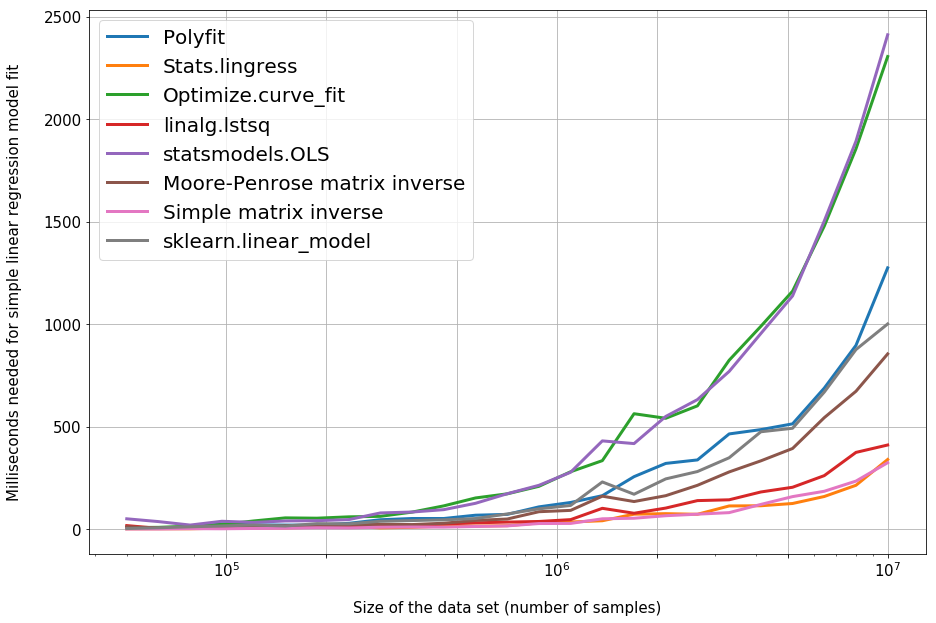

In [36]:
plt.figure(figsize=(15,10))
for i in df.columns:
    plt.semilogx((n_data),df[i],lw=3)
plt.xticks([1e5,2e5,5e5,1e6,2e6,5e6,1e7],fontsize=15)
plt.xlabel("\nSize of the data set (number of samples)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Milliseconds needed for simple linear regression model fit\n",fontsize=15)
plt.grid(True)
plt.legend([name for name in df.columns],fontsize=20)

In [37]:
a1=df.iloc[n_levels-1]

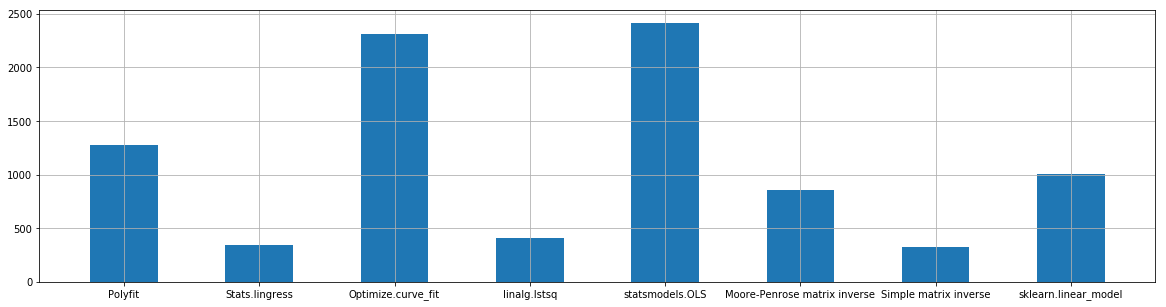

In [43]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar( x=[l*0.8 for l in range(8)],height=a1, width=0.4,
        tick_label=list(a1.index))
plt.show()

# A sample code for Sklearn Linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

In [4]:
# sckit-learn implementation

In [5]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

In [6]:
# printing values
print('Coefficients:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('mean squared error: ', mse)
print('R2 score: ', r2)


Coefficients: [[2.93655106]]
Intercept: [2.55808002]
mean squared error:  0.07623324582875009
R2 score:  0.9038655568672764


In [7]:
# plotting values

Text(0, 0.5, 'y')

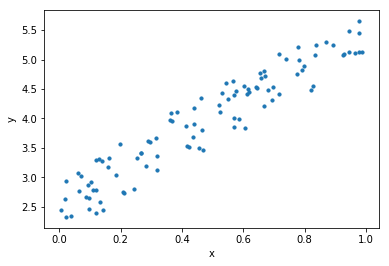

In [8]:
# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

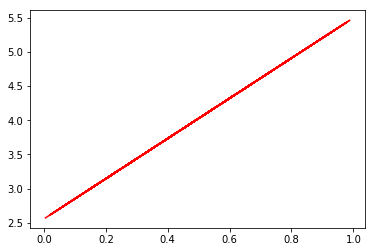

In [9]:
# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [16]:
# # https://colab.research.google.com/drive/1Ok3rFBLb6NETwK8ubWoFzluGgVVpE0uQ#scrollTo=2CFHD2ImCKcC

# Here are the links for sample codes as well :

# https://colab.research.google.com/drive/1LVRBw48Gu1B255SkmlM8T1baIIfuCGS8

# https://colab.research.google.com/drive/1jK2GYCKiJwhHwKnfNoxOAaRQWY9a4280

# https://colab.research.google.com/drive/1tSpBoEn2phIZxxv4GDaDE2zwJRc18EkT
